
# Importing libraries


In [119]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Setup : Import the Dataset
Dataset from Kaggle : World Happiness Report
Source: https://www.kaggle.com/datasets/unsdsn/world-happiness

In [120]:
df_2019 = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\\2019.csv")
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [121]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [122]:
# Filter the relevant columns: Country, Score (Happiness score), and GDP per capita
data_2019 = df_2019[['Country or region', 'Score', 'GDP per capita']].copy()

# DBSCAN
DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.

It groups ‘densely grouped’ data points into a single cluster

In [123]:
#Standardize the data (excluding the 'Country or region' column)
scaler = StandardScaler()
X = scaler.fit_transform(data_2019[['Score', 'GDP per capita']])

# Determining eps and min_samples

Creating a K-distance graph to find a  good value for eps while setting min_samples to 5

In [124]:
#Calculating Distances to k-th Nearest Neighbors:

from sklearn.neighbors import NearestNeighbors

k = 5  
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Getting the k-th nearest distances
k_distances = distances[:, k - 1]

Plotting the K-Distance Graph

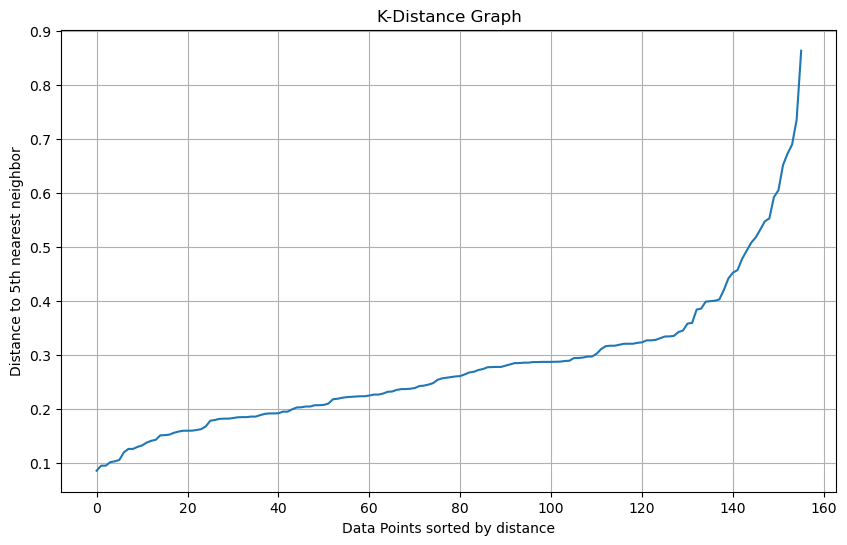

In [125]:
# Sorting the distances

import numpy as np

k_distances = np.sort(k_distances)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Distance to {}th nearest neighbor'.format(k))
plt.grid()
plt.show()

Based on the graph, knee point (transition from a dense region to a more sparse region of points) seems to occur roughly between the 120th and 130th data points.

Eps could be 0.35

Hence, eps=0.2 (good practice to choose a value slightly lower value)

In [126]:
#Applying DBSCAN
eps = 0.2  #based on above
min_samples = 5  # general practice

dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Adding the cluster labels to the original dataframe
data_2019['Cluster'] = clusters

# Inspecting the results
print(data_2019[['Country or region', 'Cluster']])

            Country or region  Cluster
0                     Finland       -1
1                     Denmark        0
2                      Norway       -1
3                     Iceland        0
4                 Netherlands        0
..                        ...      ...
151                    Rwanda       -1
152                  Tanzania       -1
153               Afghanistan       -1
154  Central African Republic       -1
155               South Sudan       -1

[156 rows x 2 columns]


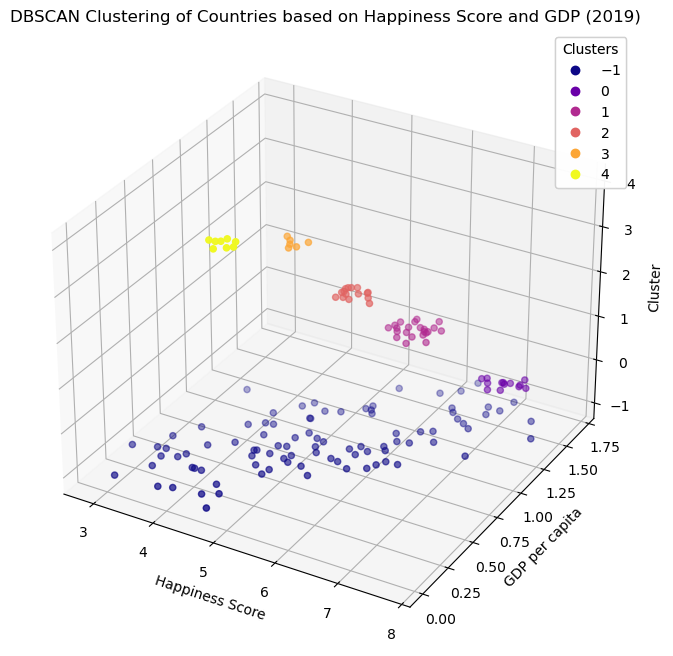

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#3D plot for DBSCAN clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot using DBSCAN clusters
scatter = ax.scatter(data_2019['Score'], data_2019['GDP per capita'],
                     data_2019['Cluster'], c=data_2019['Cluster'], cmap='plasma')

#labels and title
ax.set_title('DBSCAN Clustering of Countries based on Happiness Score and GDP (2019)')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('GDP per capita')
ax.set_zlabel('Cluster')

# Showing color bar and legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


# Silhouette Score

In [128]:
from sklearn.metrics import silhouette_score

# Removing noise points labeled as -1 for silhouette calculation
dbscan_labels = data_2019['Cluster']

# Filtering out the noise (-1) points for silhouette calculation
filtered_data = data_2019[dbscan_labels != -1]
X_filtered = scaler.fit_transform(filtered_data[['Score', 'GDP per capita']])
labels_filtered = filtered_data['Cluster']

# Calculating the silhouette score
score = silhouette_score(X_filtered, labels_filtered)
print(f'Silhouette Score for DBSCAN: {score}')

Silhouette Score for DBSCAN: 0.6842473673132903


A silhouette score greater than 0.5 indicates a good clustering quality, suggesting that the clusters are reasonably well-separated and distinct.

# Davies-Bouldin Index (DBI)

In [129]:
from sklearn.metrics import davies_bouldin_score

# Removing noise points labeled as -1 for DBI calculation
dbscan_labels = data_2019['Cluster']

# Filtering out the noise (-1) points for DBI calculation
filtered_data = data_2019[dbscan_labels != -1]
X_filtered = scaler.fit_transform(filtered_data[['Score', 'GDP per capita']])
labels_filtered = filtered_data['Cluster']

# Calculating the Davies-Bouldin Index
dbi = davies_bouldin_score(X_filtered, labels_filtered)
print(f'Davies-Bouldin Index for DBSCAN: {dbi}')

Davies-Bouldin Index for DBSCAN: 0.38048973681639453



A very good Davies-Bouldin Index (DBI) value is one that is close to 0. 

DBI < 0.5: Considered a very good score, indicating that clusters are highly distinct and compact.